# Redes neuronales para el reconocimiento de dígitos escritos a mano, multiclase 

En este ejercicio, utilizarás una red neuronal para reconocer los dígitos escritos a mano del 0 al 9.


# Outline
- [ 1 - Packages ](#1)
- [ 2 - ReLU Activation](#2)
- [ 3 - Softmax Function](#3)
  - [ Exercise 1](#ex01)
- [ 4 - Neural Networks](#4)
  - [ 4.1 Problem Statement](#4.1)
  - [ 4.2 Dataset](#4.2)
  - [ 4.3 Model representation](#4.3)
  - [ 4.4 Tensorflow Model Implementation](#4.4)
  - [ 4.5 Softmax placement](#4.5)
    - [ Exercise 2](#ex02)


<a name="1"></a>
## 1 - Packages 

En primer lugar, vamos a ejecutar la celda de abajo para importar todos los paquetes que necesitarás durante esta tarea.
- [numpy](https://numpy.org/) es el paquete fundamental para la computación científica con Python.
- [matplotlib](http://matplotlib.org) es una popular biblioteca para trazar gráficos en Python.
- tensorflow](https://www.tensorflow.org/) es una popular plataforma para el aprendizaje automático.

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import * 

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

<a name="2"></a>
## 2 - Activación ReLU
Esta semana se ha presentado una nueva activación, la Unidad Lineal Rectificada (ReLU). 
$$ a = max(0,z) \quad\quad\text {# ReLU function} $$

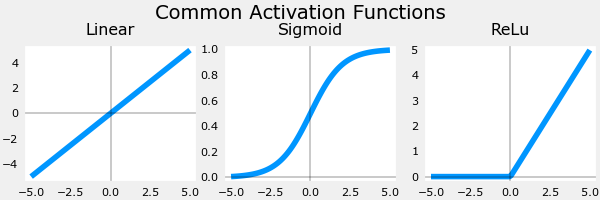

In [4]:
plt_act_trio()

<img align="right" src="./images/C2_W2_ReLu.png"     style=" width:380px; padding: 10px 20px; " >
El ejemplo de la conferencia de la derecha muestra una aplicación del ReLU. En este ejemplo, la característica derivada "conciencia" no es binaria, sino que tiene un rango continuo de valores. La sigmoidea es mejor para situaciones de encendido/apagado o binarias. El ReLU proporciona una relación lineal continua. Además, tiene un rango "off" en el que la salida es cero.     
La característica "off" hace que el ReLU sea una activación no lineal. ¿Por qué es necesario? Esto permite que varias unidades contribuyan a la función resultante sin interferir. Esto se examina más en el laboratorio opcional de apoyo. 

<a name="3"></a>
## 3 - Función Softmax
Una red neuronal multiclase genera N salidas. Una salida se selecciona como la respuesta predicha. En la capa de salida, se genera un vector $\mathbf{z}$ mediante una función lineal que se introduce en una función softmax. La función softmax convierte $\mathbf{z}$ en una distribución de probabilidad como se describe a continuación. Después de aplicar softmax, cada salida estará entre 0 y 1 y las salidas sumarán 1. Pueden interpretarse como probabilidades. Las entradas más grandes al softmax corresponderán a probabilidades de salida más grandes.
<center>  <img  src="./images/C2_W2_NNSoftmax.PNG" width="600" />  

La función softmax se puede escribir:
$$a_j = \frac{e^{z_j}}{ \sum_{k=0}^{N-1}{e^{z_k} }} \tag{1}$$

Donde $z = \mathbf{w} \cdot \mathbf{x} + b$ y N es el número de características/categorías en la capa de salida.  

<a name="ex01"></a>
### Exercise 1
Vamos a crear una implementación de NumPy:

In [1]:
# UNQ_C1
# GRADED CELL: my_softmax

def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """    
    ### START CODE HERE ### 
    ez = np.exp(z)
    a = ez/np.sum(ez)

    ### END CODE HERE ### 
    return a

In [5]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

# BEGIN UNIT TEST  
test_my_softmax(my_softmax)
# END UNIT TEST  

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]
 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    Una implementación utiliza el bucle for para construir primero el denominador y luego un segundo bucle para calcular cada salida.
    
```python
def my_softmax(z):  
    N = len(z)
    a =                     # initialize a to zeros 
    ez_sum =                # initialize sum to zero
    for k in range(N):      # loop over number of outputs             
        ez_sum +=           # sum exp(z[k]) to build the shared denominator      
    for j in range(N):      # loop over number of outputs again                
        a[j] =              # divide each the exp of each output by the denominator   
    return(a)
```
<details>
  <summary><font size="3" color="darkgreen"><b>Click for code</b></font></summary>
   
```python
def my_softmax(z):  
    N = len(z)
    a = np.zeros(N)
    ez_sum = 0
    for k in range(N):                
        ez_sum += np.exp(z[k])       
    for j in range(N):                
        a[j] = np.exp(z[j])/ez_sum   
    return(a)

Or, a vector implementation:

def my_softmax(z):  
    ez = np.exp(z)              
    a = ez/np.sum(ez)           
    return(a)

```


A continuación, varía los valores de las entradas `z`. Observe en particular cómo el exponencial en el numerador magnifica las pequeñas diferencias en los valores. Observe también que los valores de salida suman uno.

In [5]:
plt.close("all")
plt_softmax(my_softmax)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<a name="4"></a>
## 4 - Redes neuronales

En la tarea de la semana pasada, implementó una red neuronal para realizar una clasificación binaria. Esta semana la extenderá a la clasificación multiclase. Para ello se utilizará la activación softmax.


<a name="4.1"></a>
### 4.1 Planteamiento del problema

En este ejercicio, utilizarás una red neuronal para reconocer diez dígitos escritos a mano, del 0 al 9. Se trata de una tarea de clasificación multiclase en la que se selecciona una de n opciones. El reconocimiento automatizado de dígitos escritos a mano se utiliza mucho hoy en día, desde el reconocimiento de códigos postales en sobres de correo hasta el reconocimiento de cantidades escritas en cheques bancarios. 
 


<a name="4.2"></a>
### 4.2 Conjunto de datos

Empezarás cargando el conjunto de datos para esta tarea. 
- La función `load_data()` que se muestra a continuación carga los datos en las variables `X` e `y`.


- El conjunto de datos contiene 5000 ejemplos de entrenamiento de dígitos escritos a mano $^1$.  

    - Cada ejemplo de entrenamiento es una imagen en escala de grises de 20 píxeles x 20 píxeles del dígito. 
        - Cada píxel está representado por un número de coma flotante que indica la intensidad de la escala de grises en ese lugar. 
        - La cuadrícula de 20 por 20 píxeles se "desenrolla" en un vector de 400 dimensiones. 
        - Cada ejemplo de entrenamiento se convierte en una sola fila de nuestra matriz de datos `X`. 
        - Esto nos da una matriz `X` de 5000 x 400 en la que cada fila es un ejemplo de entrenamiento de una imagen de un dígito escrito a mano.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- La segunda parte del conjunto de entrenamiento es un vector de 5000 x 1 dimensiones `y` que contiene etiquetas para el conjunto de entrenamiento
    - Y = 0" si la imagen es del dígito "0", "Y = 4" si la imagen es del dígito "4" y así sucesivamente.

$^1$<sub> Este es un subconjunto del conjunto de datos de dígitos manuscritos del MNIST (http://yann.lecun.com/exdb/mnist/)</sub>

In [6]:
# load dataset
X, y = load_data()

#### 4.2.1 Ver las variables
Vamos a familiarizarnos con el conjunto de datos.  
- Un buen punto de partida es imprimir cada variable y ver lo que contiene.

El código siguiente imprime el primer elemento de las variables `X` y `y`.  

In [7]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

In [7]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


#### 4.2.2 Check the dimensions of your variables

Another way to get familiar with your data is to view its dimensions. Please print the shape of `X` and `y` and see how many training examples you have in your dataset.

In [9]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


#### 4.2.3 Visualización de los datos

Empezaremos visualizando un subconjunto del conjunto de entrenamiento. 
- En la celda de abajo, el código selecciona aleatoriamente 64 filas de `X`, asigna cada fila a una imagen en escala de grises de 20 píxeles por 20 píxeles y muestra las imágenes juntas. 
- La etiqueta de cada imagen se muestra encima de la imagen 

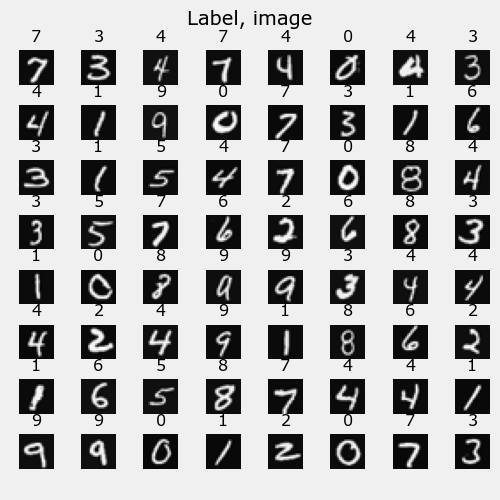

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

<a name="4.3"></a>
### 4.3 Representación del modelo

La red neuronal que utilizará en esta tarea se muestra en la siguiente figura. 
- Tiene dos capas densas con activaciones ReLU seguidas de una capa de salida con una activación lineal. 
    - Recordemos que nuestras entradas son los valores de los píxeles de las imágenes de los dígitos.
    - Como las imágenes tienen un tamaño de 20$ por 20$, esto nos da 400$ de entradas  
    
<img src="images/C2_W2_Assigment_NN.png" width="600" height="450">

- Los parámetros tienen dimensiones dimensionadas para una red neuronal con 25$ unidades en la capa 1, 15$ unidades en la capa 2 y 10$ unidades de salida en la capa 3, una por cada dígito.

    - Recordemos que las dimensiones de estos parámetros se determina como sigue:
        - Si la red tiene $s_{in}$ unidades en una capa y $s_{out}$ unidades en la capa siguiente, entonces 
            - $W$ será de dimensión $s_{in} \times_{out}$.
            - $b$ será un vector con $s_{out}$ elementos
  
    - Por lo tanto, las formas de `W`, y `b`, son 
        - capa1: La forma de `W1` es (400, 25) y la forma de `b1` es (25,)
        - capa2: La forma de `W2` es (25, 15) y la forma de `b2` es: (15,)
        - capa3: La forma de `W3` es (15, 10) y la forma de `b3` es: (10,)
>**Nota:** El vector de sesgo `b` puede representarse como una matriz 1-D (n,) o 2-D (n,1). Tensorflow utiliza una representación 1-D y este laboratorio mantendrá esa convención:
               

<a name="4.4"></a>
### 4.4 Tensorflow Model Implementation


Los modelos de Tensorflow se construyen capa por capa. Las dimensiones de entrada de una capa ($s_{in}$ arriba) se calculan para usted. Usted especifica las *dimensiones de salida* de una capa y esto determina la dimensión de entrada de la siguiente capa. La dimensión de entrada de la primera capa se obtiene a partir del tamaño de los datos de entrada especificados en la sentencia `model.fit`. 
>**Nota:** También es posible añadir una capa de entrada que especifique la dimensión de entrada de la primera capa. Por ejemplo:  
`tf.keras.Input(shape=(400,)), #especifica la forma de entrada`  
Lo incluiremos aquí para iluminar el dimensionamiento del modelo.

<a name="4.5"></a>
### 4.5 Colocación de softmax
Como se describió en la clase y en el laboratorio opcional de softmax, la estabilidad numérica mejora si el softmax se agrupa con la función de pérdida en lugar de la capa de salida durante el entrenamiento. Esto tiene implicaciones cuando se *construye* el modelo y se *utiliza* el modelo.  
Construyendo:  
* La capa final Dense debe utilizar una activación "lineal". Esto es efectivamente ninguna activación. 
* La declaración `model.compile` indicará esto incluyendo `from_logits=True`.
`loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) `  
* Esto no afecta a la forma del objetivo. En el caso de SparseCategorialCrossentropy, el objetivo es el dígito esperado, 0-9.

Usando el modelo:
* Las salidas no son probabilidades. Si se desean probabilidades de salida, aplique una función softmax.

<a name="ex02"></a>
### Ejercicio 2

A continuación, utilizando Keras [Sequential model](https://keras.io/guides/sequential_model/) y [Dense Layer](https://keras.io/api/layers/core_layers/dense/) con una activación ReLU para construir la red de tres capas descrita anteriormente.

In [9]:
# UNQ_C2
# GRADED CELL: Sequential model
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(400,)),    
        Dense(25, activation='relu', name = "L1"), 
        Dense(15, activation='relu',  name = "L2"), 
        Dense(10, activation='linear', name = "L3"),  
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)

In [10]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


<details>
  <summary><font size="3" color="darkgreen"><b>Expected Output (Click to expand)</b></font></summary>
The `model.summary()` function displays a useful summary of the model. Note, the names of the layers may vary as they are auto-generated unless the name is specified.    
    
```
Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 25)                10025     
_________________________________________________________________
L2 (Dense)                   (None, 15)                390       
_________________________________________________________________
L3 (Dense)                   (None, 10)                160       
=================================================================
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________
```

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
```python
tf.random.set_seed(1234)
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(400,)),     # @REPLACE 
        Dense(25, activation='relu', name = "L1"), # @REPLACE 
        Dense(15, activation='relu',  name = "L2"), # @REPLACE  
        Dense(10, activation='linear', name = "L3"),  # @REPLACE 
        ### END CODE HERE ### 
    ], name = "my_model" 
)
``` 

In [13]:
# BEGIN UNIT TEST     
test_model(model, 10, 400)
# END UNIT TEST     

All tests passed!


Los recuentos de parámetros mostrados en el resumen corresponden al número de elementos de las matrices de peso y sesgo, como se muestra a continuación.

Examinemos más a fondo los pesos para verificar que tensorflow produjo las mismas dimensiones que calculamos anteriormente.

In [11]:
[layer1, layer2, layer3] = model.layers

In [12]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


**Expected Output**
```
W1 shape = (400, 25), b1 shape = (25,)  
W2 shape = (25, 15), b2 shape = (15,)  
W3 shape = (15, 1), b3 shape = (10,)
```

El siguiente código:
* define una función de pérdida, `SparseCategoricalCrossentropy` e indica que el softmax debe ser incluido con el cálculo de la pérdida añadiendo `from_logits=True`)
* define un optimizador. Una opción popular es el Adaptive Moment (Adam) que fue descrito en la conferencia.

In [13]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 [==============================] - 3s 6ms/step - loss: 1.7094
Epoch 2/40
157/157 [==============================] - 1s 4ms/step - loss: 0.7480
Epoch 3/40
157/157 [==============================] - 1s 4ms/step - loss: 0.4428
Epoch 4/40
157/157 [==============================] - 0s 3ms/step - loss: 0.3463
Epoch 5/40
157/157 [==============================] - 1s 3ms/step - loss: 0.2977
Epoch 6/40
157/157 [==============================] - 1s 4ms/step - loss: 0.2630
Epoch 7/40
157/157 [==============================] - 0s 3ms/step - loss: 0.2361
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2131
Epoch 9/40
157/157 [==============================] - 0s 3ms/step - loss: 0.2004
Epoch 10/40
157/157 [==============================] - 0s 3ms/step - loss: 0.1805
Epoch 11/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1692
Epoch 12/40
157/157 [==============================] - 1s 3ms/step - loss: 0.1580
Epoch 13/40
157/157 [====

#### Épocas y lotes
En la declaración `compilar` anterior, el número de `epocas` se estableció en 100. Esto especifica que todo el conjunto de datos debe ser aplicado durante el entrenamiento 100 veces.  Durante el entrenamiento, se ve una salida que describe el progreso del entrenamiento y que tiene el siguiente aspecto
```
Época 1/100
157/157 [==============================] - 0s 1ms/paso - pérdida: 2.2770
```
La primera línea, `Epoch 1/100`, describe la época en la que se está ejecutando el modelo. Por eficiencia, el conjunto de datos de entrenamiento se divide en "lotes". El tamaño por defecto de un lote en Tensorflow es de 32. Hay 5000 ejemplos en nuestro conjunto de datos o aproximadamente 157 lotes. La notación en la segunda línea `157/157 [====` está describiendo qué lote se ha ejecutado.

#### Pérdida (coste)
En el curso 1, aprendimos a seguir el progreso del descenso de gradiente controlando el coste. Idealmente, el coste disminuirá a medida que aumente el número de iteraciones del algoritmo. Tensorflow se refiere al coste como "pérdida". Arriba, usted vio la pérdida mostrada en cada época mientras se ejecutaba `model.fit`. El método [.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model) devuelve una variedad de métricas incluyendo la pérdida. Esto se captura en la variable `history` de arriba. Esto se puede utilizar para examinar la pérdida en un gráfico como se muestra a continuación.

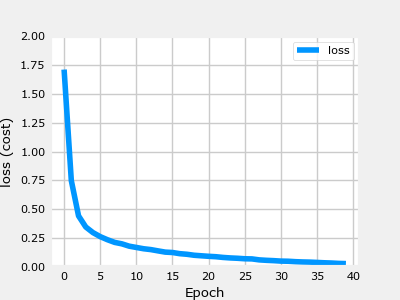

In [14]:
plot_loss_tf(history)

#### Predicción 
Para hacer una predicción, utiliza Keras `predict`. A continuación, X[1015] contiene una imagen de un dos.

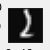

 predicting a Two: 
[[ -7.99  -2.23   0.77  -2.41 -11.66 -11.15  -9.53  -3.36  -4.42  -7.17]]
 Largest Prediction index: 2


In [15]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

La mayor salida es predicción[2], que indica que el dígito predicho es un '2'. Si el problema sólo requiere una selección, es suficiente. Utilice NumPy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) para seleccionarla. Si el problema requiere una probabilidad, se requiere un softmax:

In [16]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[1.42e-04 4.49e-02 8.98e-01 3.76e-02 3.61e-06 5.97e-06 3.03e-05 1.44e-02
  5.03e-03 3.22e-04]]
Total of predictions: 1.000


Para devolver un entero que represente el objetivo predicho, se quiere el índice de la mayor probabilidad. Esto se consigue con la función Numpy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

In [17]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


Comparemos las predicciones frente a las etiquetas para una muestra aleatoria de 64 dígitos. Esto tarda un momento en ejecutarse.

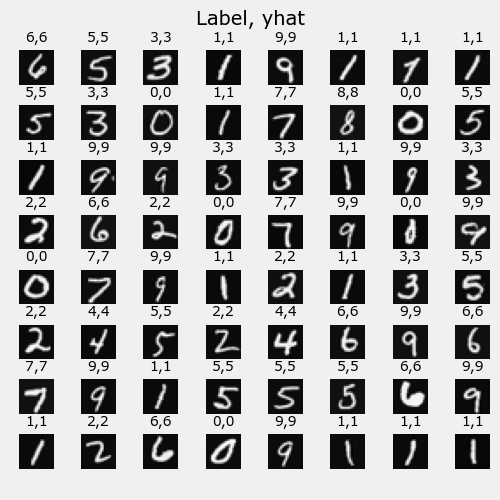

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

Veamos algunos de los errores. 
>Nota: aumentar el número de épocas de entrenamiento puede eliminar los errores en este conjunto de datos.

15 errors out of 5000 images


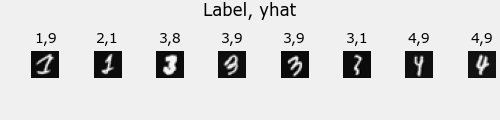

In [20]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")

### ¡Enhorabuena!
Ha construido y utilizado con éxito una red neuronal para realizar una clasificación multiclase.